## Imports and Functions

In [65]:
# imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
# functions
def num_age(x):
    '''make age categories numeric'''
    if x == '18-39':
        return 0
    elif x == '40-44':
        return 1
    elif x == '45-49':
        return 2
    elif x == '50-54':
        return 3
    elif x == '55-59':
        return 4
    elif x == '60-64':
        return 5
    elif x == '65-69':
        return 6
    return 7


def cat_clean(x):
    '''binary columns were floats, make them ints'''
    return int(x)


def prep(df):
    '''prepare dataframe for EDA'''
    df['age'] = df['age'].apply(lambda x: num_age(x))
    df['clear'] = df['clear'].apply(lambda x: cat_clean(x))
    df['overcast'] = df['overcast'].apply(lambda x: cat_clean(x))
    df['partially_cloudy'] = df['partially_cloudy'].apply(lambda x: cat_clean(x))
    df['rain'] = df['rain'].apply(lambda x: cat_clean(x))

    cols = ['year', 'age', 'male', 'time_seconds', 'minimum_temperature',
           'maximum_temperature', 'temperature', 'relative_humidity', 'wind_speed',
           'precipitation', 'precipitation_cover', 'cloud_cover', 'clear',
           'overcast', 'partially_cloudy', 'rain']

    for col in cols:
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

    df.drop(columns=['maximum_temperature', 'minimum_temperature'], inplace=True)

    event_dict = {year: df[df['year'] == year] for year in df['year'].unique()}
    
    return event_dict


def usable(event_dict, num):
    '''specify which years are usable based on minimum number of participants
    returns dict with years that exceed minimum values are correspoding df'''
    can_use = []
    for year in event_dict.keys():
        if len(event_dict[year]) > num:
            can_use.append(year)
    return {year: event_dict[year] for year in can_use}


def top_n(event_dict, num):
    '''take in event dict and first num of finishers that are desired,
    return df of top n racers for all years, use in conjuction with usable()'''
    df = pd.DataFrame()
    for year in event_dict.keys():
        df = pd.concat([df, event_dict[year].sort_values(by='time_seconds').iloc[:num]], ignore_index=True)
    return df
        
    
def n_range(event_dict, low, high):
    '''take in dictionary of dfs from prep(), upper percentage as float, lower percentage as float
    return df'''
    df = pd.DataFrame()
    for year in event_dict.keys():
        df = pd.concat([df, event_dict[year].sort_values(by='time_seconds').iloc[int(len(event_dict[year]) * low): int(len(event_dict[year]) * high)]], ignore_index=True)
    return df

## Berlin

In [86]:
berlin = pd.read_csv('./data/Berlin_Data/Clean/Clean_Berlin_Results_Weather.csv')

berlin_dict = prep(berlin)

berlin_10 = top_n(usable(berlin_dict, 10_000), 10_000)
    
berlin_20_80 = n_range(usable(berlin_dict, 10_000), .2, .8)

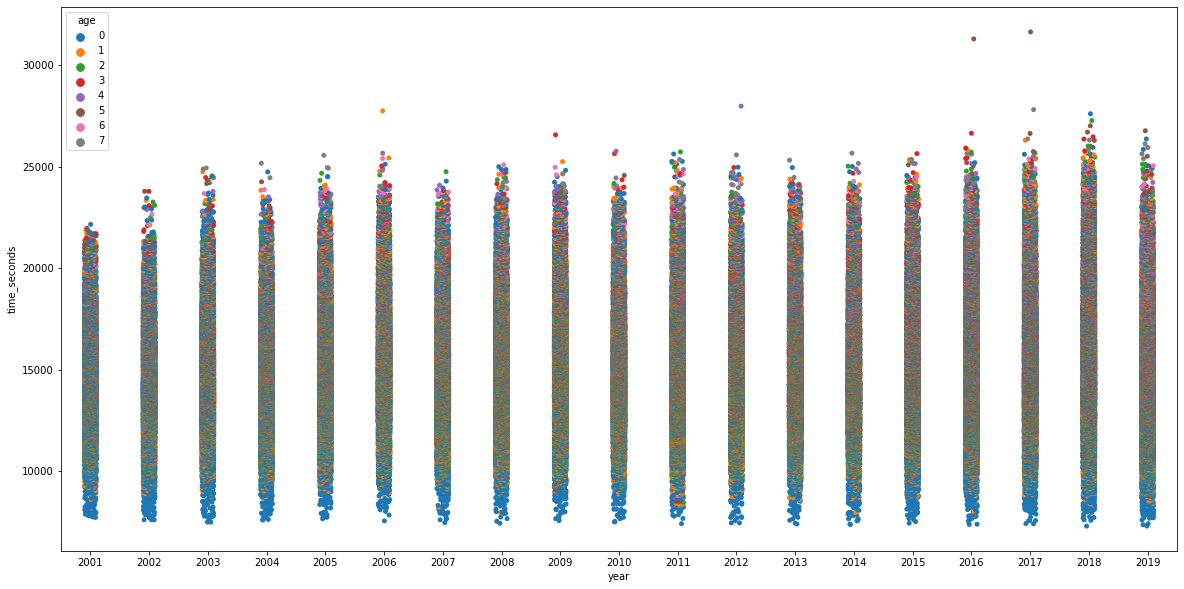

In [22]:
plt.figure(figsize=(20,10))
sns.stripplot(x=berlin[berlin['year'] > 2000]['year'], y=berlin['time_seconds'], hue=berlin['age']);

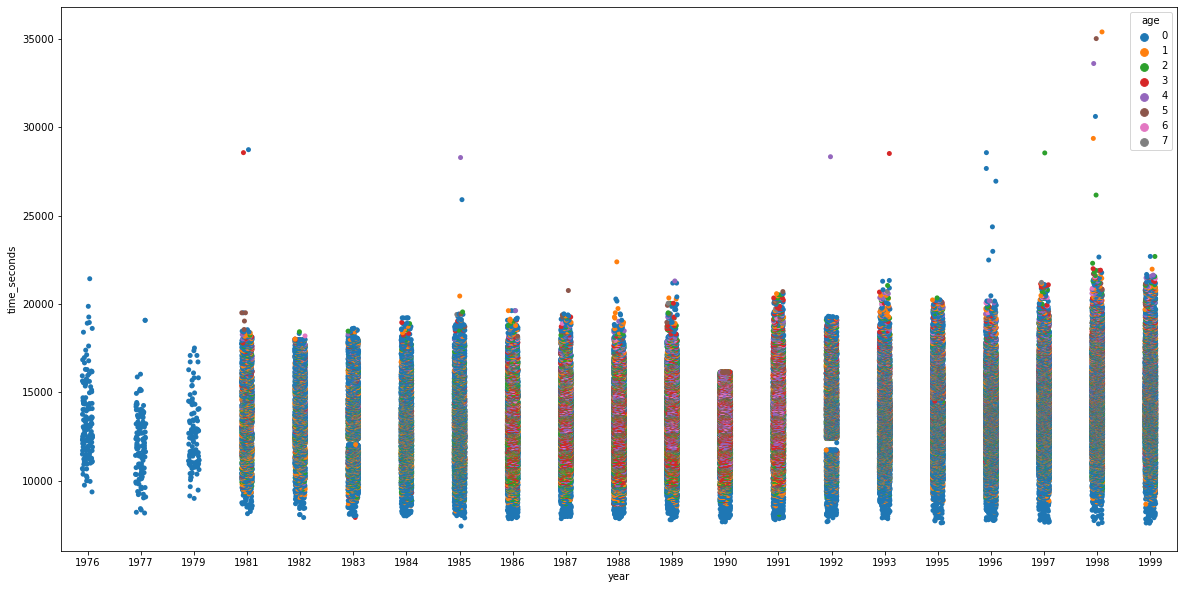

In [23]:
plt.figure(figsize=(20,10))
sns.stripplot(x=berlin[berlin['year'] < 2000]['year'], y=berlin['time_seconds'], hue=berlin['age']);

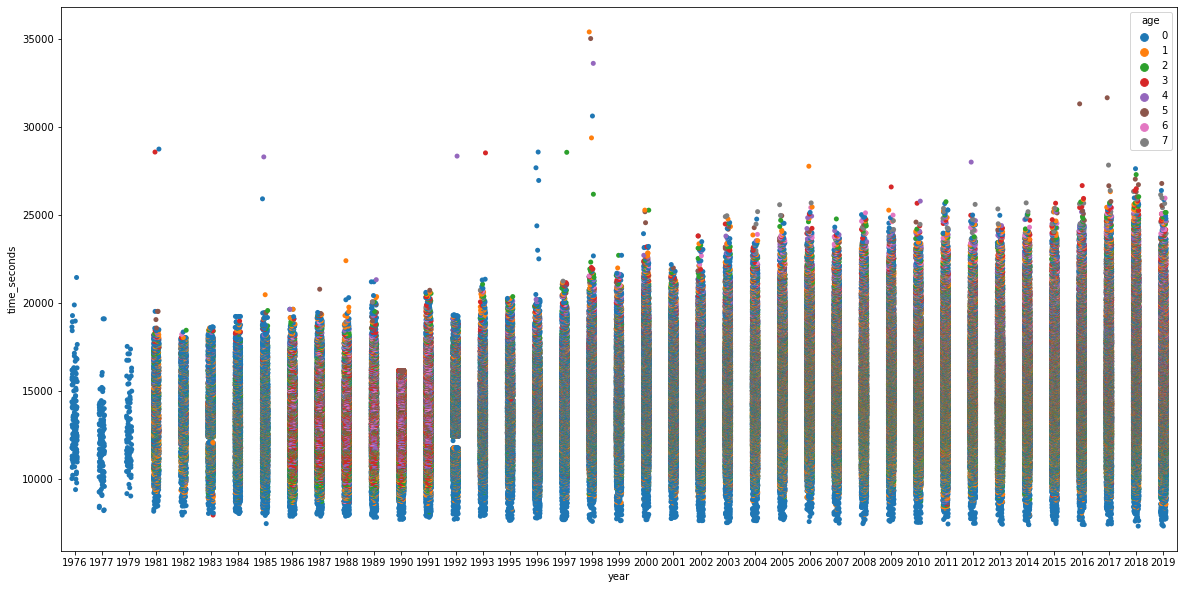

In [24]:
plt.figure(figsize=(20,10))
sns.stripplot(x=berlin['year'], y=berlin['time_seconds'], hue=berlin['age']);

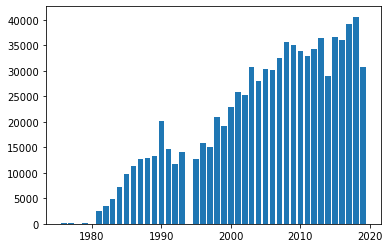

In [25]:
berlin_plotting = berlin.groupby('year').count()

plt.bar(x=berlin_plotting.index, height=berlin_plotting['age']);

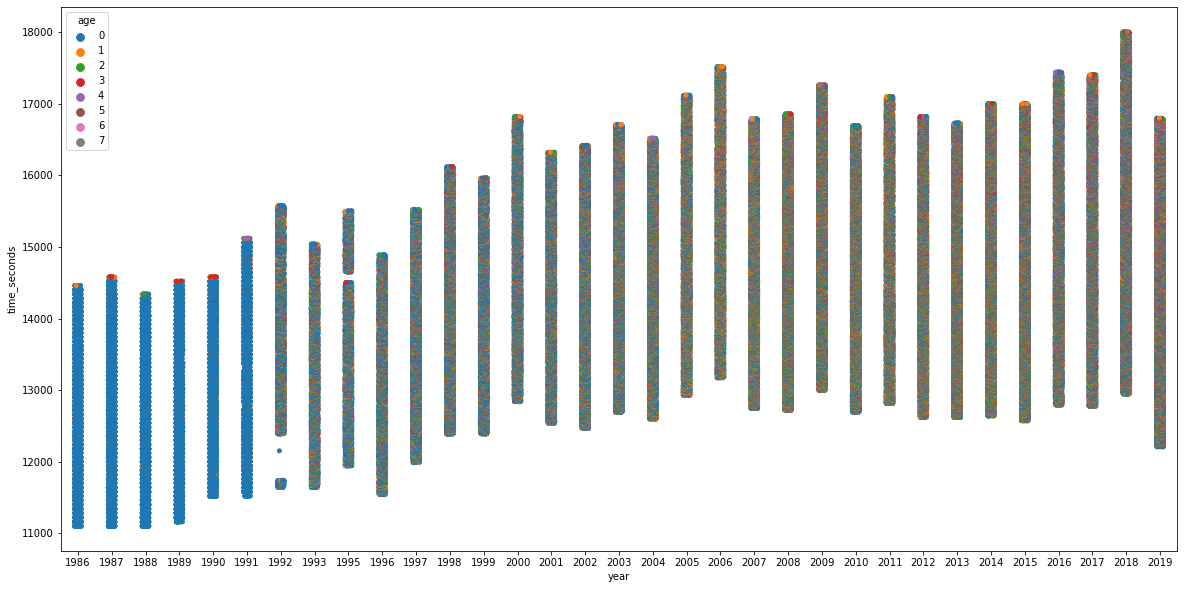

In [68]:
plt.figure(figsize=(20,10))
sns.stripplot(x=berlin_20_80['year'], y=berlin_20_80['time_seconds'], hue=berlin_20_80['age']);

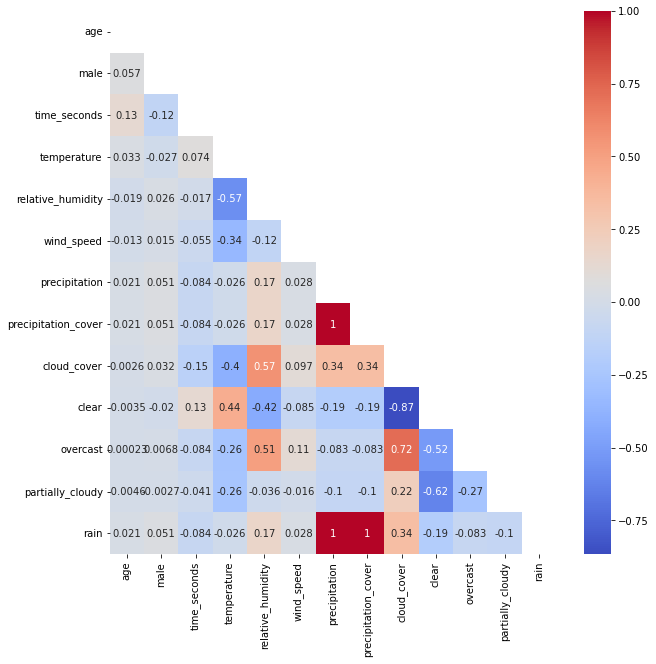

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(berlin_10.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(berlin_10.drop(columns='year').corr())));

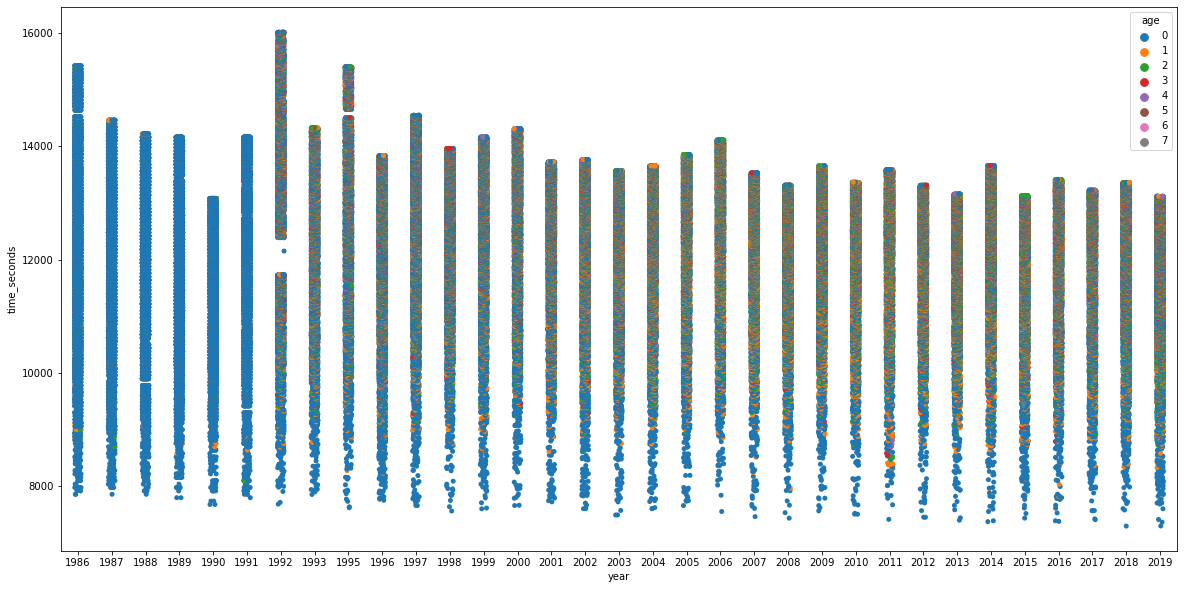

In [51]:
plt.figure(figsize=(20,10))
sns.stripplot(x=berlin_10['year'], y=berlin_10['time_seconds'], hue=berlin_10['age']);

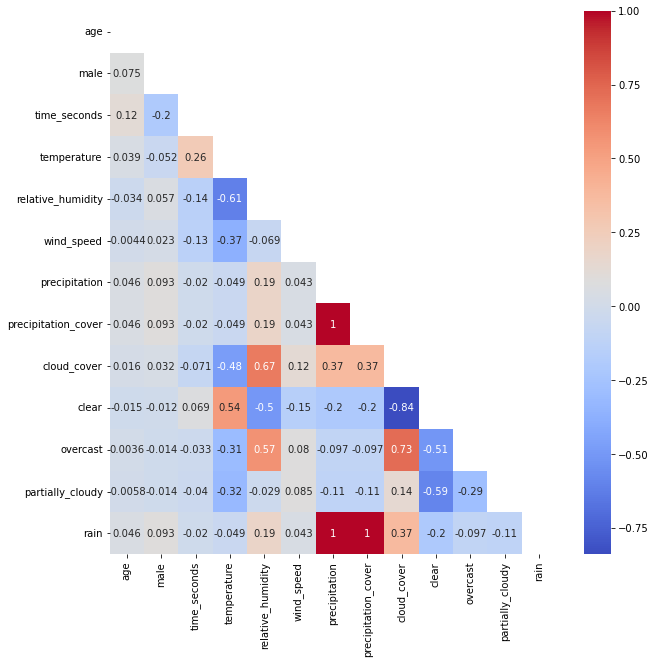

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(berlin_20_80.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(berlin_20_80.drop(columns='year').corr())));

<AxesSubplot:>

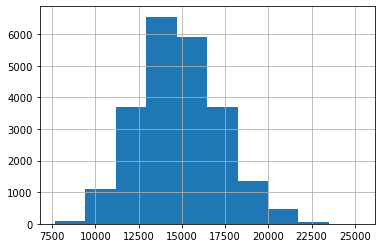

In [59]:
berlin.query('year == 2000').time_seconds.hist()

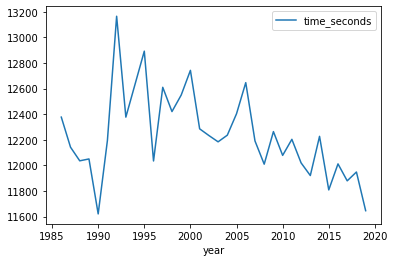

In [126]:
berlin_plotting = berlin_10.groupby('year').agg({'time_seconds': 'mean'})
berlin_plotting.plot();

## Boston

In [132]:
boston = pd.read_csv('./data/Boston_Data/Clean/Clean_Boston_Results_Weather.csv')

boston_dict = prep(boston)

boston_10 = top_n(usable(boston_dict, 10_000), 10_000)
    
boston_20_80 = n_range(usable(boston_dict, 10_000), .2, .8)

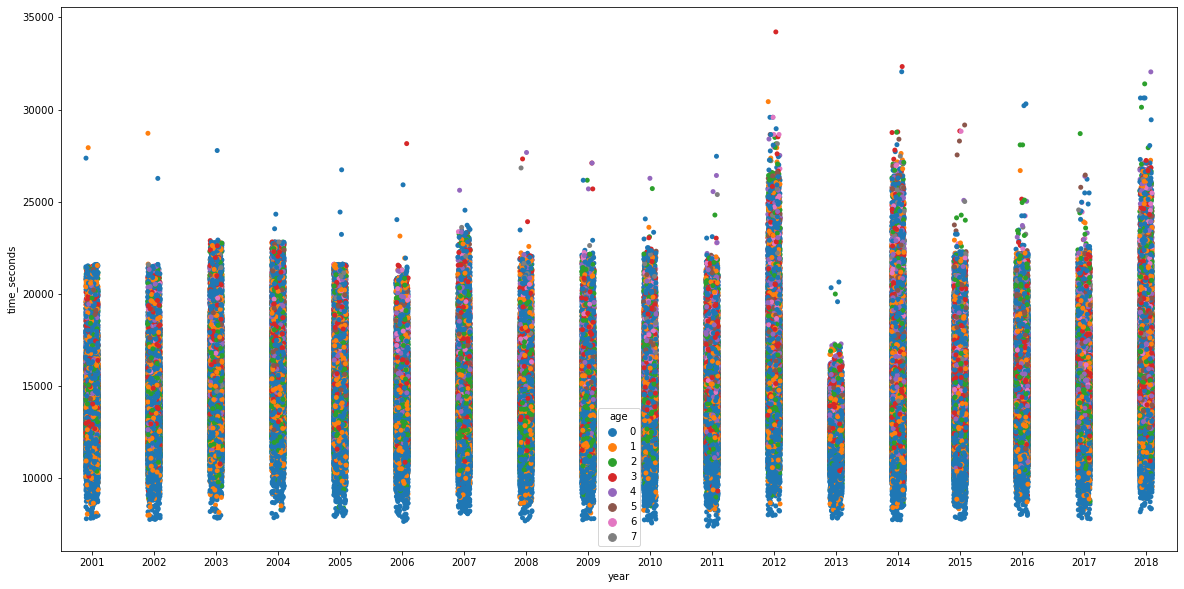

In [133]:
plt.figure(figsize=(20,10))
sns.stripplot(x=boston['year'], y=boston['time_seconds'], hue=boston['age']);

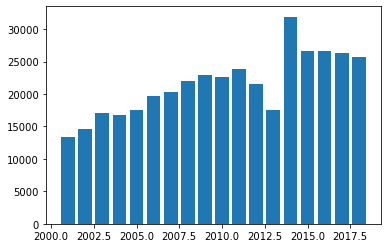

In [134]:
boston_plotting = boston.groupby('year').count()

plt.bar(x=boston_plotting.index, height=boston_plotting['age']);

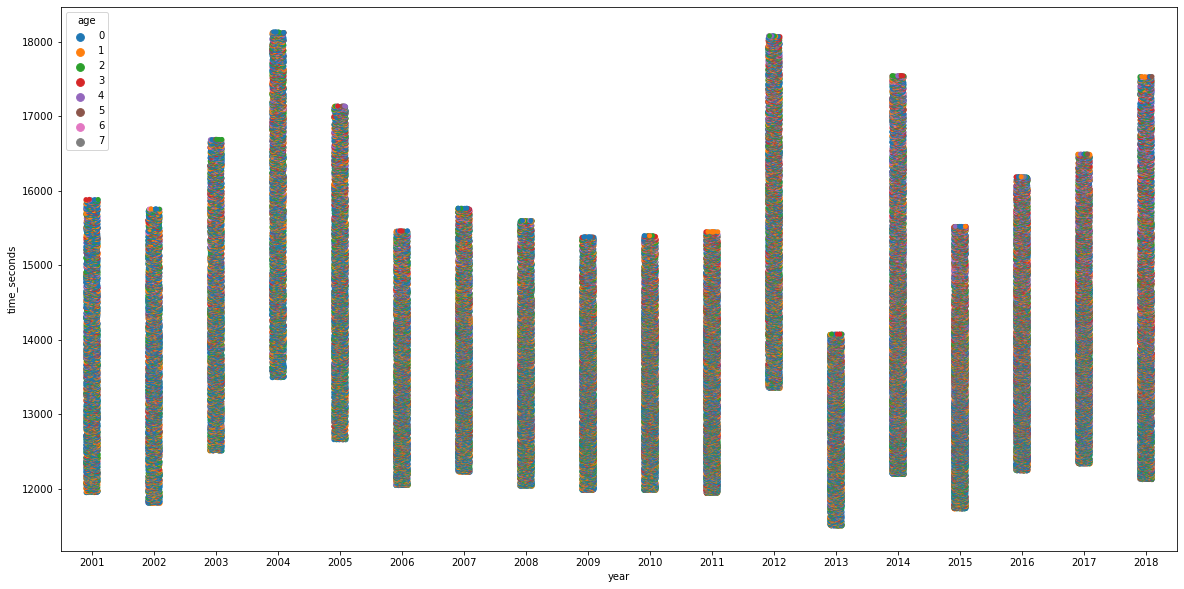

In [135]:
plt.figure(figsize=(20,10))
sns.stripplot(x=boston_20_80['year'], y=boston_20_80['time_seconds'], hue=boston_20_80['age']);

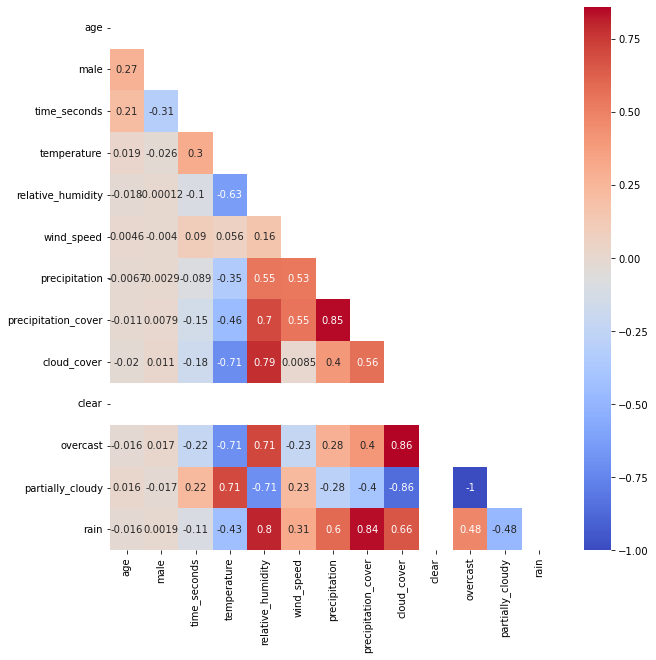

In [136]:
plt.figure(figsize=(10,10))
sns.heatmap(boston_10.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(boston_10.drop(columns='year').corr())));

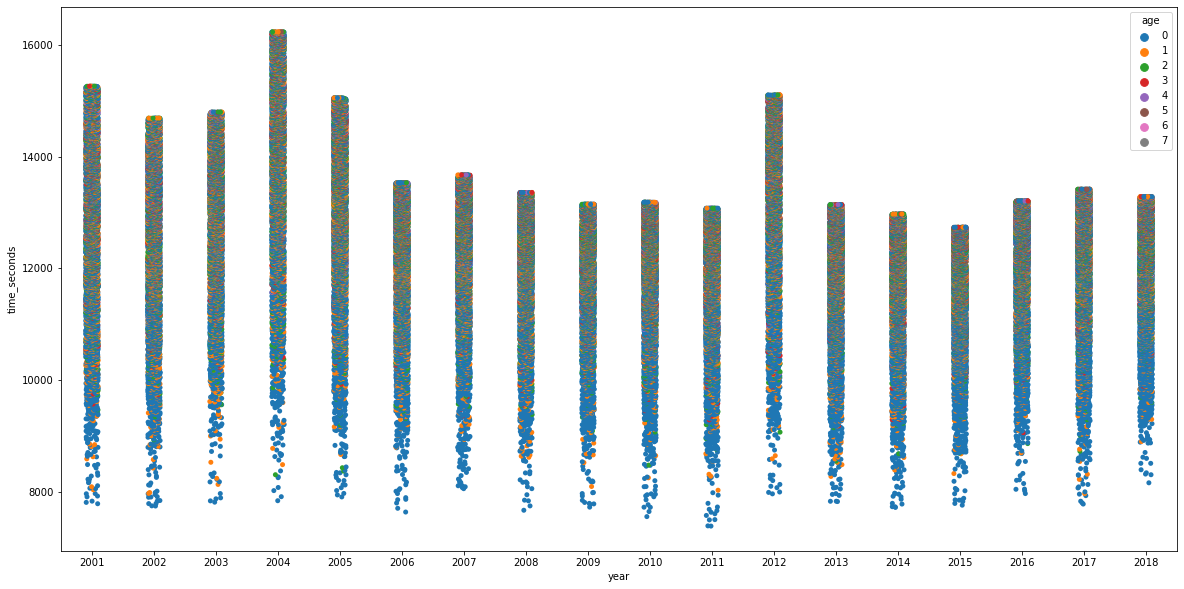

In [137]:
plt.figure(figsize=(20,10))
sns.stripplot(x=boston_10['year'], y=boston_10['time_seconds'], hue=boston_10['age']);

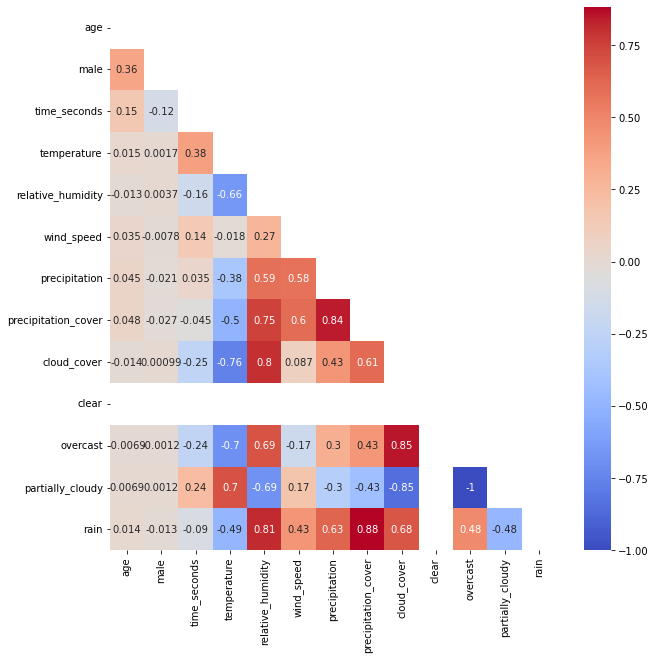

In [138]:
plt.figure(figsize=(10,10))
sns.heatmap(boston_20_80.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(boston_20_80.drop(columns='year').corr())));

<AxesSubplot:>

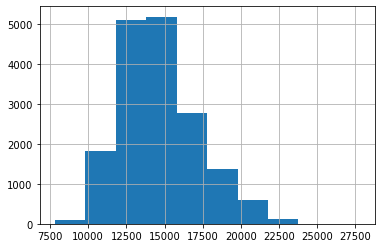

In [143]:
boston.query('year == 2003').time_seconds.hist()

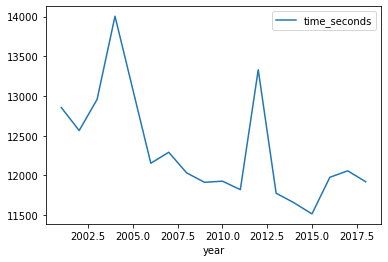

In [140]:
boston_plotting = boston_10.groupby('year').agg({'time_seconds': 'mean'})
boston_plotting.plot();

## Chicago

In [88]:
chicago = pd.read_csv('./data/Chicago_Data/Clean/Clean_Chicago_Results_Weather.csv')

chicago_dict = prep(chicago)

chicago_10 = top_n(usable(chicago_dict, 10_000), 10_000)
    
chicago_20_80 = n_range(usable(chicago_dict, 10_000), .2, .8)

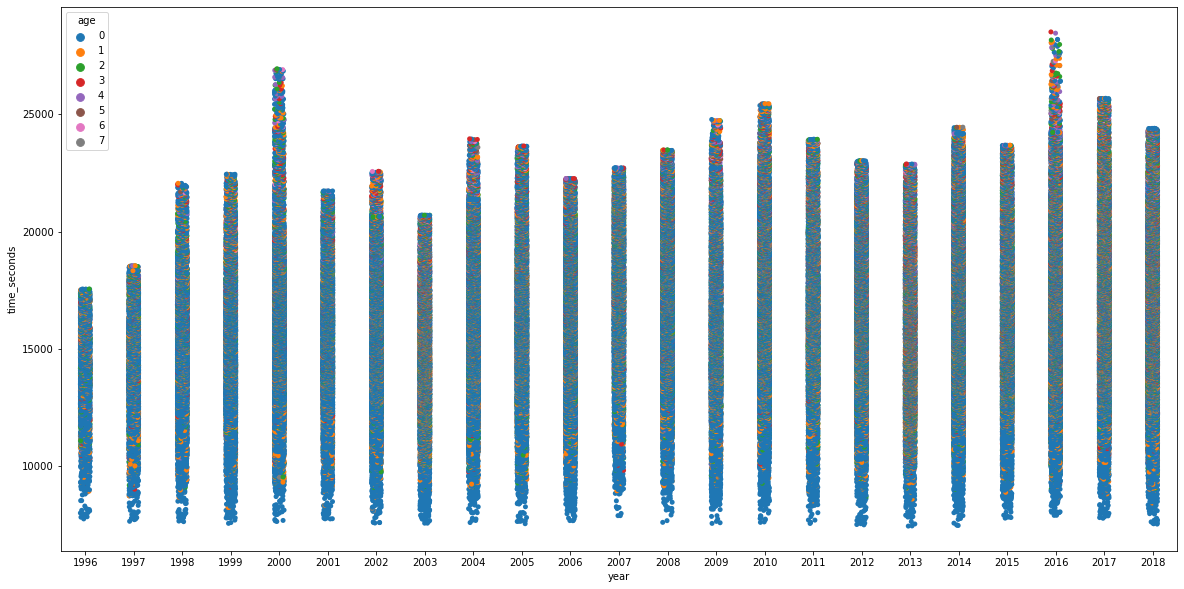

In [111]:
plt.figure(figsize=(20,10))
sns.stripplot(x=chicago['year'], y=chicago['time_seconds'], hue=chicago['age']);

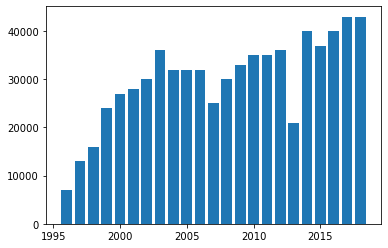

In [112]:
chicago_plotting = chicago.groupby('year').count()

plt.bar(x=chicago_plotting.index, height=chicago_plotting['age']);

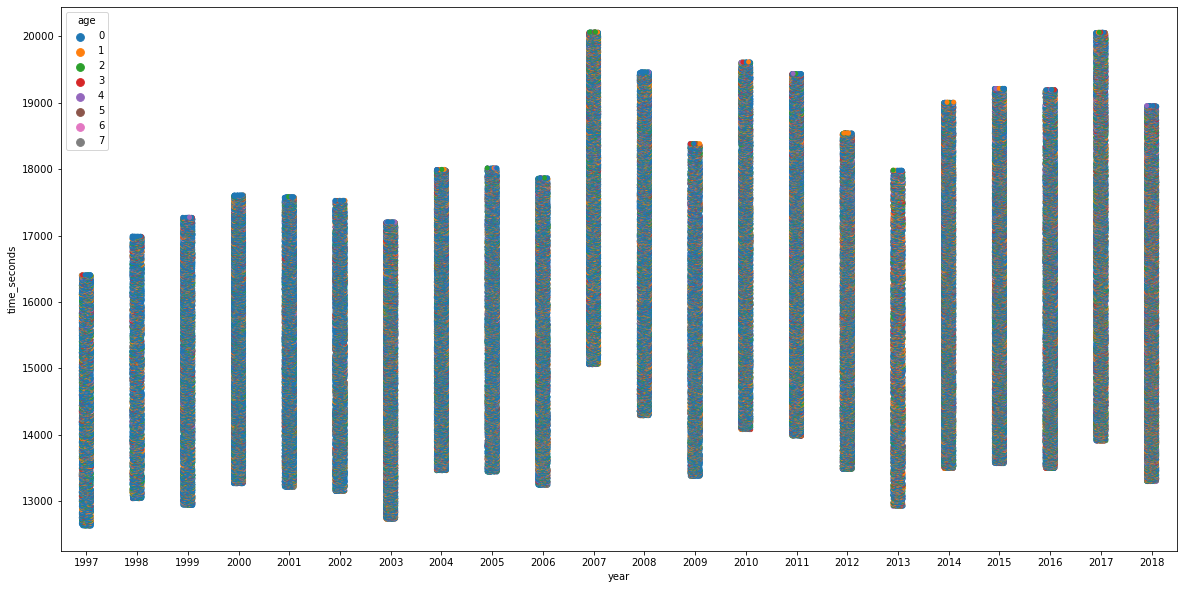

In [113]:
plt.figure(figsize=(20,10))
sns.stripplot(x=chicago_20_80['year'], y=chicago_20_80['time_seconds'], hue=chicago_20_80['age']);

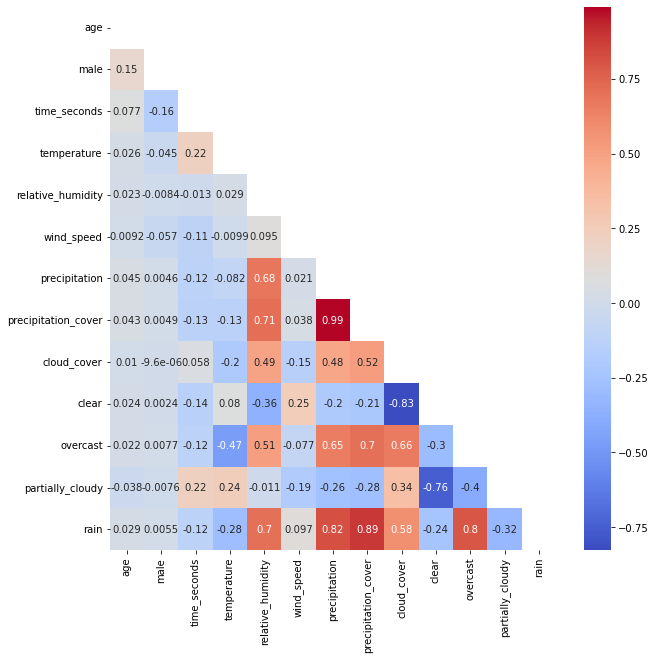

In [114]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_10.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(chicago_10.drop(columns='year').corr())));

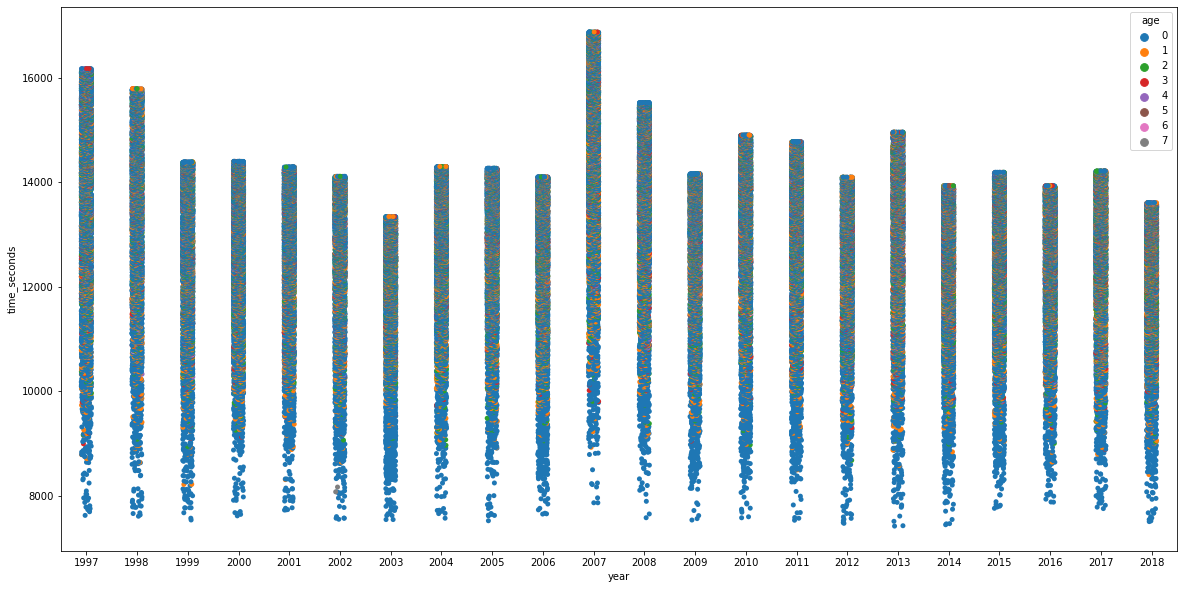

In [115]:
plt.figure(figsize=(20,10))
sns.stripplot(x=chicago_10['year'], y=chicago_10['time_seconds'], hue=chicago_10['age']);

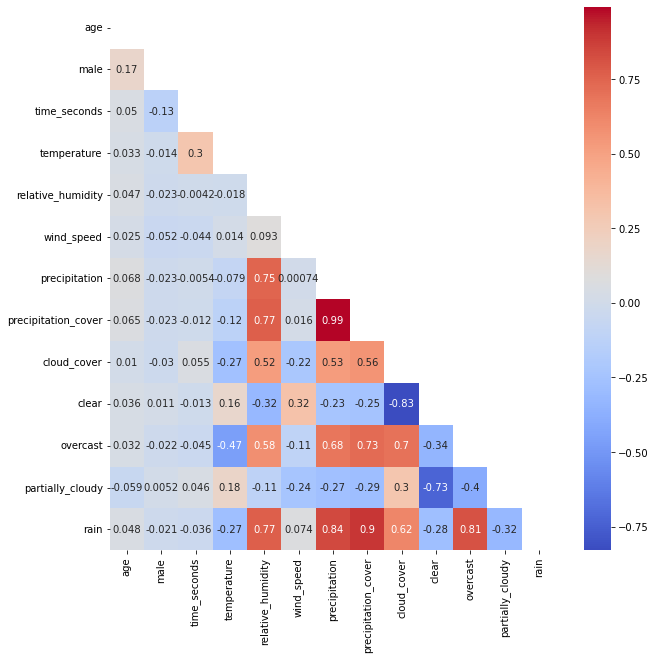

In [116]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_20_80.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(chicago_20_80.drop(columns='year').corr())));

<AxesSubplot:>

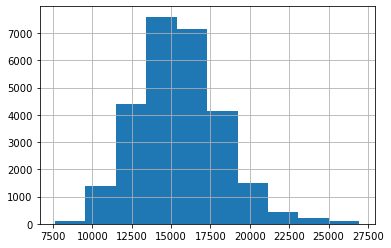

In [117]:
chicago.query('year == 2000').time_seconds.hist()

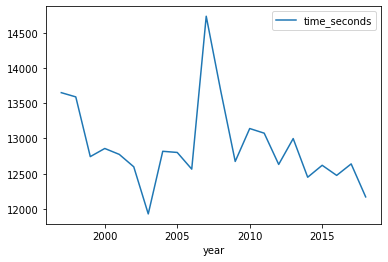

In [129]:
chicago_plotting = chicago_10.groupby('year').agg({'time_seconds': 'mean'})
chicago_plotting.plot();

## London

In [89]:
london = pd.read_csv('./data/London_Data/Clean/Clean_London_Results_Weather.csv')

london_dict = prep(london)

london_10 = top_n(usable(london_dict, 10_000), 10_000)
    
london_20_80 = n_range(usable(london_dict, 10_000), .2, .8)

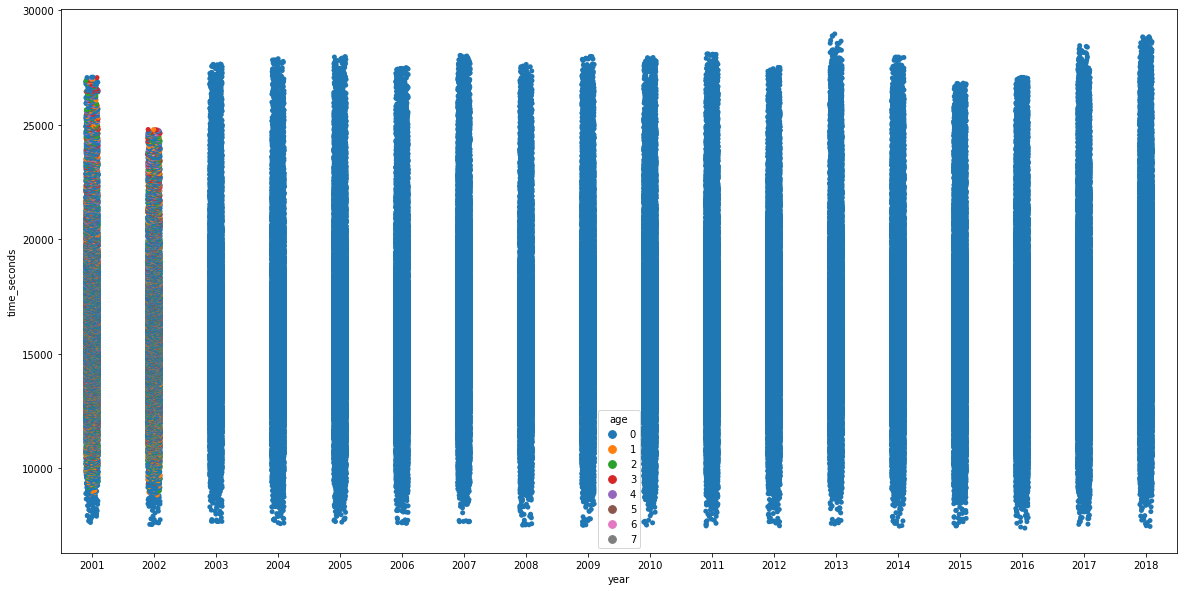

In [118]:
plt.figure(figsize=(20,10))
sns.stripplot(x=london['year'], y=london['time_seconds'], hue=london['age']);

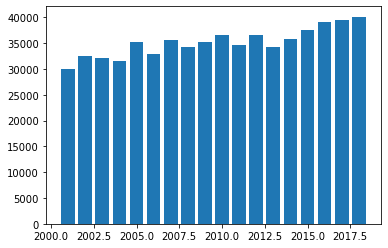

In [119]:
london_plotting = london.groupby('year').count()

plt.bar(x=london_plotting.index, height=london_plotting['age']);

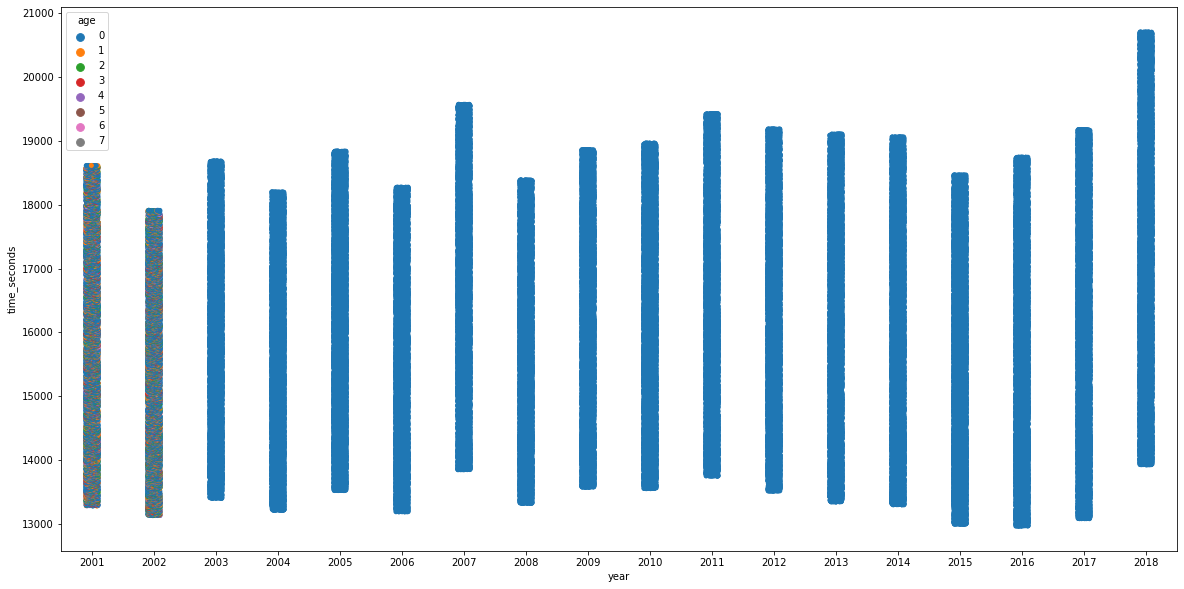

In [120]:
plt.figure(figsize=(20,10))
sns.stripplot(x=london_20_80['year'], y=london_20_80['time_seconds'], hue=london_20_80['age']);

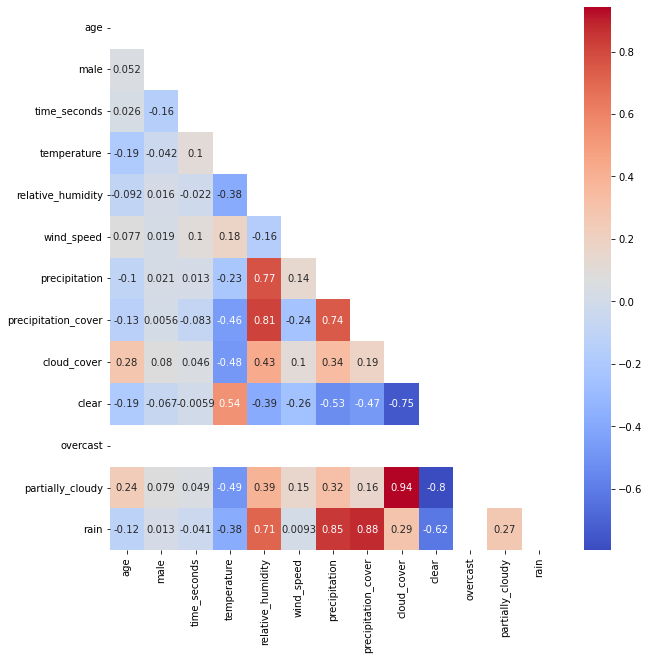

In [121]:
plt.figure(figsize=(10,10))
sns.heatmap(london_10.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(london_10.drop(columns='year').corr())));

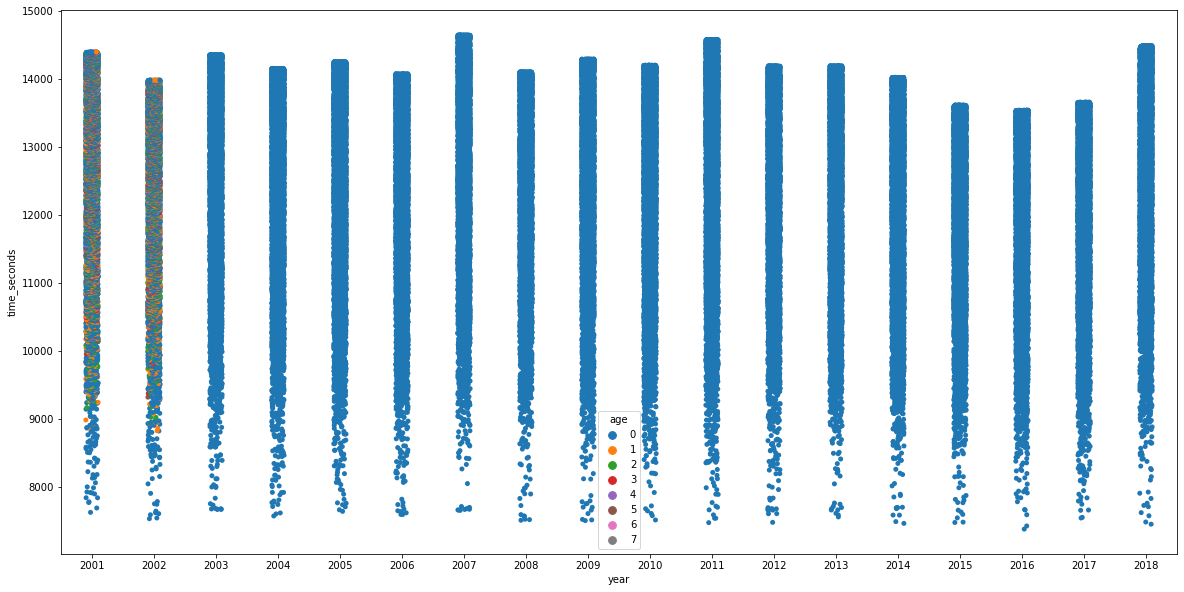

In [122]:
plt.figure(figsize=(20,10))
sns.stripplot(x=london_10['year'], y=london_10['time_seconds'], hue=london_10['age']);

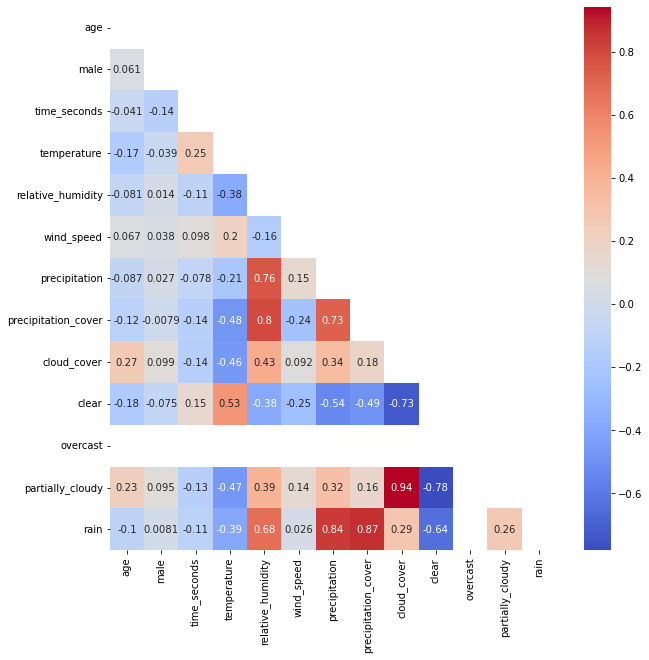

In [123]:
plt.figure(figsize=(10,10))
sns.heatmap(london_20_80.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(london_20_80.drop(columns='year').corr())));

<AxesSubplot:>

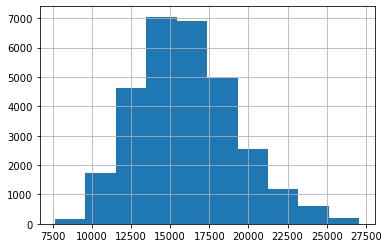

In [125]:
london.query('year == 2001').time_seconds.hist()

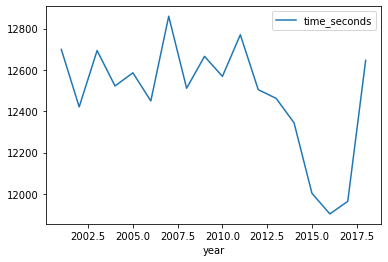

In [128]:
london_plotting = london_10.groupby('year').agg({'time_seconds': 'mean'})
london_plotting.plot();

## NYC

In [106]:
nyc = pd.read_csv('./data/NYC_Data/Clean/Clean_NYC_Results_Weather.csv')

nyc_dict = prep(nyc)

nyc_9 = top_n(usable(nyc_dict, 9_000), 9_000)
    
nyc_20_80 = n_range(usable(nyc_dict, 9_000), .2, .8)

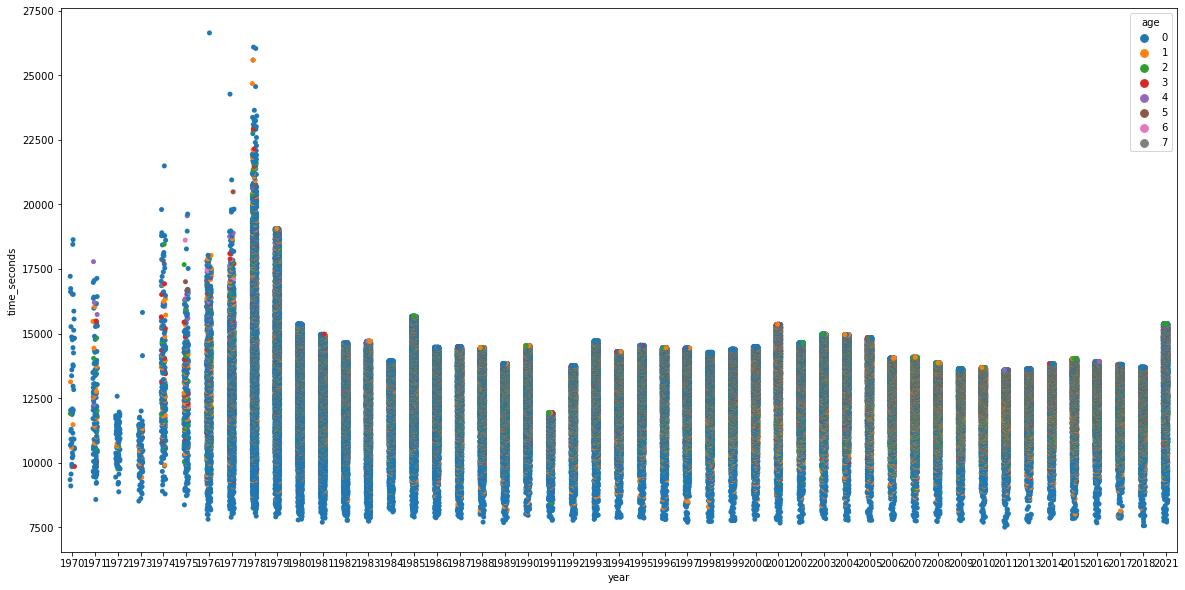

In [102]:
plt.figure(figsize=(20,10))
sns.stripplot(x=nyc['year'], y=nyc['time_seconds'], hue=nyc['age']);

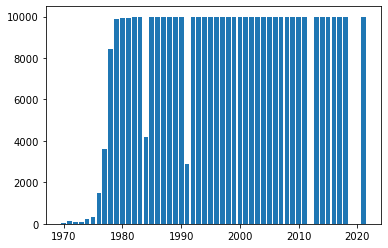

In [103]:
nyc_plotting = nyc.groupby('year').count()

plt.bar(x=nyc_plotting.index, height=nyc_plotting['age']);

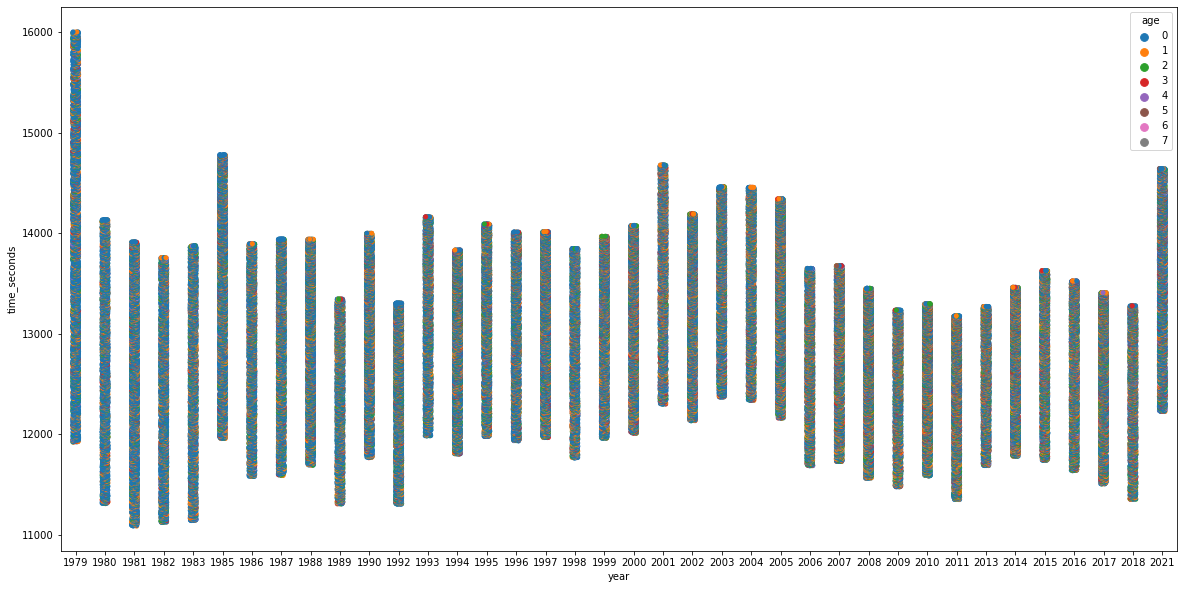

In [104]:
plt.figure(figsize=(20,10))
sns.stripplot(x=nyc_20_80['year'], y=nyc_20_80['time_seconds'], hue=nyc_20_80['age']);

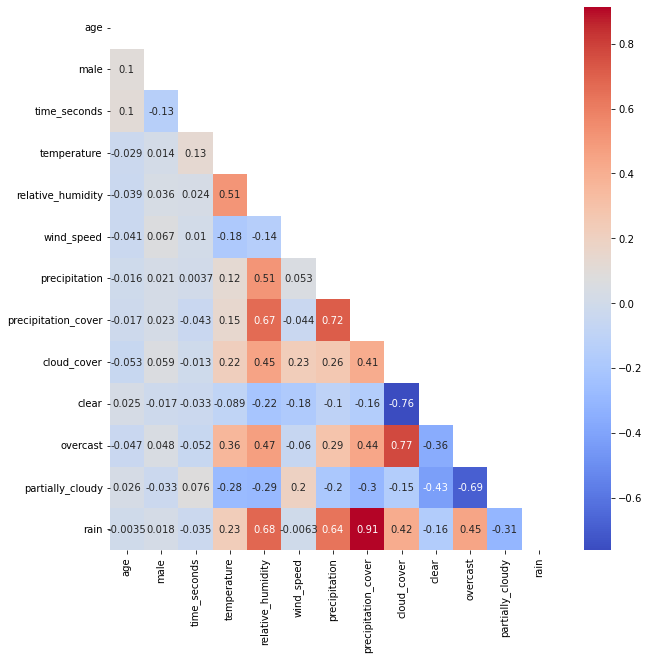

In [107]:
plt.figure(figsize=(10,10))
sns.heatmap(nyc_9.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(nyc_9.drop(columns='year').corr())));

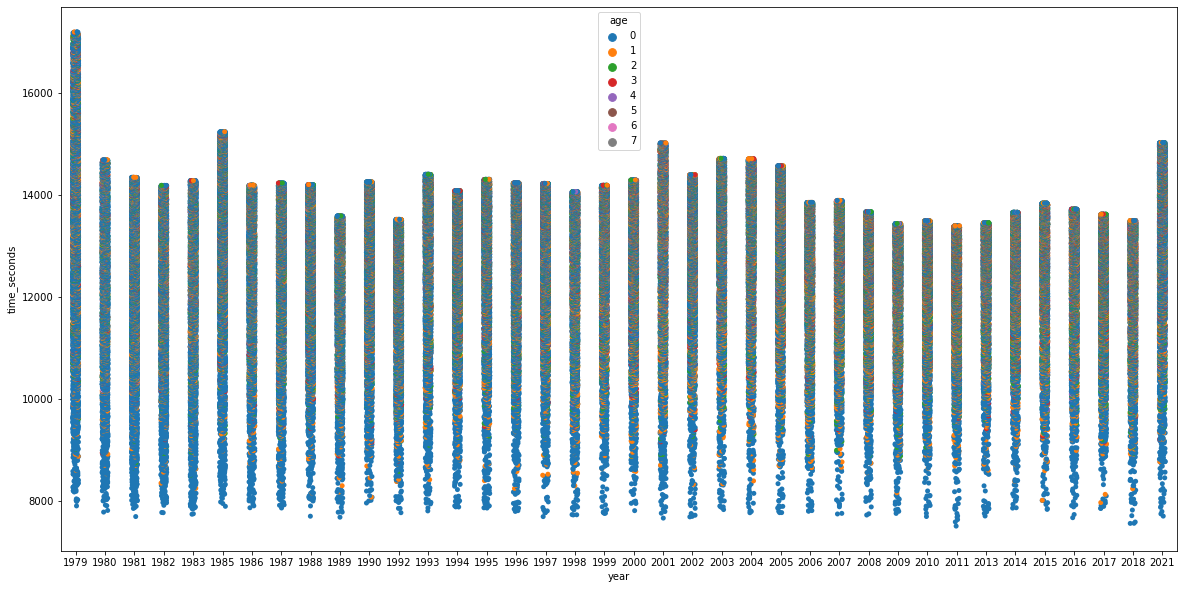

In [108]:
plt.figure(figsize=(20,10))
sns.stripplot(x=nyc_9['year'], y=nyc_9['time_seconds'], hue=nyc_9['age']);

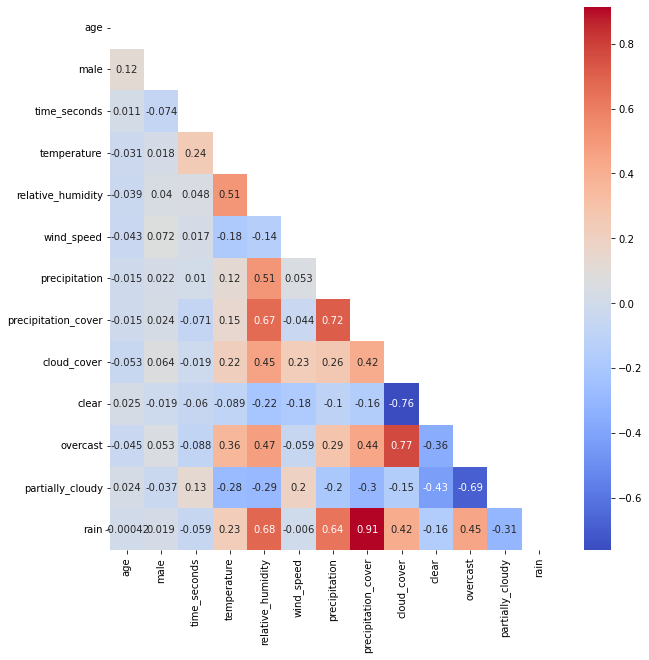

In [109]:
plt.figure(figsize=(10,10))
sns.heatmap(nyc_20_80.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(nyc_20_80.drop(columns='year').corr())));

<AxesSubplot:>

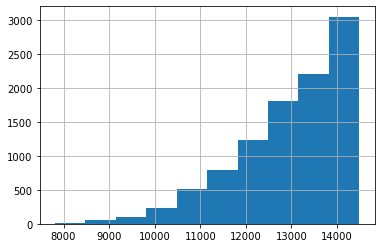

In [110]:
nyc.query('year == 2000').time_seconds.hist()

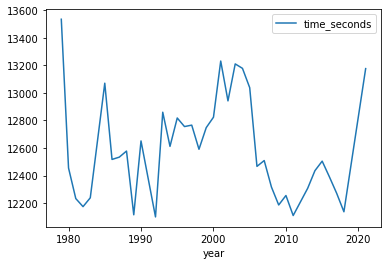

In [127]:
nyc_plotting = nyc_10.groupby('year').agg({'time_seconds': 'mean'})
nyc_plotting.plot();